In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
d1 = pd.read_csv("./Data/good_data240_to_490_w_xkal.csv")
d2 = pd.read_csv("./Data/good_data565_to_750_w_xkal.csv")
d1 = pd.concat([d1,d2])
d1.head()

,Unnamed: 0,x_kalman1,labels,Model Confidence Prediction,Model Thresholded Prediction,min,sec
0,240,0.03,0,2,0,6,18
1,241,0.03,0,2,0,6,18
2,242,0.04,0,3,0,6,18
3,243,0.03,0,1,0,6,18
4,244,0.03,0,0,0,6,18


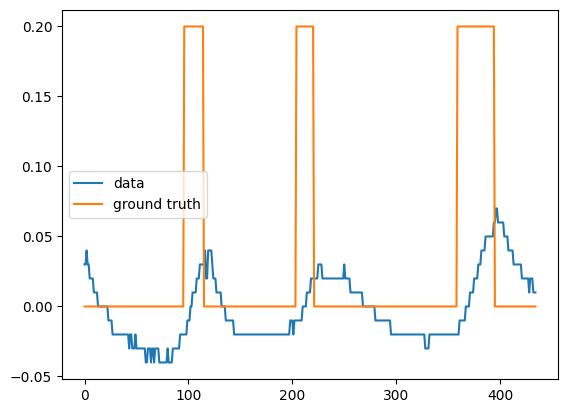

In [20]:
plt.plot(d1.iloc[:,1].tolist(), label="data") # Filtered data
plt.plot([x*0.2 for x in d1.iloc[:,2].tolist()],label="ground truth") # Ground truth
plt.legend()
plt.show()

In [21]:
def thresh_preds(col,threshold):
    """
    Take in list and threshold to binary classification
    """
    out = []
    for i in col:
        if i > threshold:
            out.append(1)
        else:
            out.append(0)
    return out

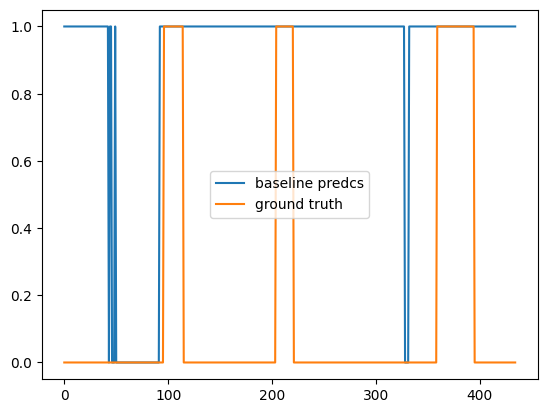

In [41]:
baseline_preds = thresh_preds(d1.iloc[:,1].tolist(),-0.03)
plt.plot(baseline_preds,label ="baseline predcs")
plt.plot(d1.iloc[:,2].tolist(),label="ground truth") # Ground truth
plt.legend()
plt.show()

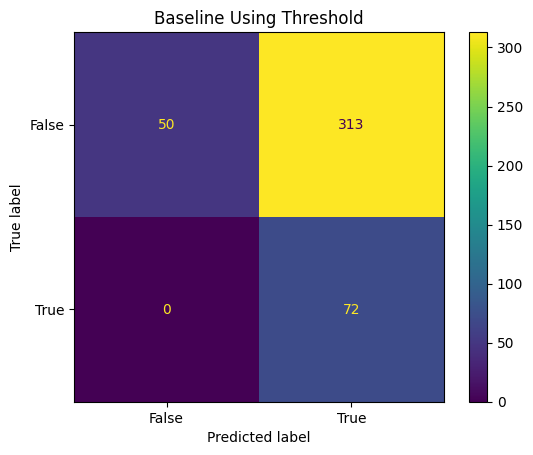

Accuracy: 0.28045977011494255
Precision: 0.18701298701298702
Recall: 1.0
F1: 0.3150984682713348


In [60]:
# Confustion matrix
baseline_preds = thresh_preds(d1.iloc[:,1].tolist(),-0.03)
from sklearn import metrics 
from sklearn.metrics import accuracy_score, precision_score, recall_score
confusion_matrix = metrics.confusion_matrix(d1.iloc[:,2].tolist(), baseline_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.title("Baseline Using Threshold")
plt.show()

#Scores:


# create sample true values and predicted values
from sklearn.metrics import accuracy_score, precision_score, recall_score
ground_truth = d1.iloc[:,2].tolist()
preds = baseline_preds

# calculate accuracy, precision, and recall
accuracy = accuracy_score(ground_truth, preds)
precision = precision_score(ground_truth, preds)
recall = recall_score(ground_truth, preds)
f1 = metrics.f1_score(ground_truth,preds)
# print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
f1 = metrics.f1_score(ground_truth,preds)
print("F1:",f1)


0.0
Accuracy: 0.6620689655172414
Precision: 0.2641509433962264
Recall: 0.5833333333333334

0.01
Accuracy: 0.6919540229885057
Precision: 0.2459016393442623
Recall: 0.4166666666666667

0.02
Accuracy: 0.7816091954022989
Precision: 0.31746031746031744
Recall: 0.2777777777777778

0.03
Accuracy: 0.8091954022988506
Precision: 0.35135135135135137
Recall: 0.18055555555555555

0.04
Accuracy: 0.825287356321839
Precision: 0.4090909090909091
Recall: 0.125

0.05
Accuracy: 0.8160919540229885
Precision: 0.1
Recall: 0.013888888888888888

0.0
Accuracy: 0.6620689655172414
Precision: 0.2641509433962264
Recall: 0.5833333333333334

-0.01
Accuracy: 0.6252873563218391
Precision: 0.26666666666666666
Recall: 0.7222222222222222

-0.02
Accuracy: 0.5862068965517241
Precision: 0.2768595041322314
Recall: 0.9305555555555556

-0.03
Accuracy: 0.28045977011494255
Precision: 0.18701298701298702
Recall: 1.0